<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Read the AirPassengers dataset
df = pd.read_csv('/content/stock_data.csv',
					index_col ='Date')

# Print the first five rows of the dataset
df.head()

,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [88]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [15]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]['Close']

In [16]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [19]:
#get d term
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs
ndiffs(stock['FB'],test='adf')

1

In [154]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [155]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [95]:
def Model(train,order):
  model=ARIMA(train,order=order)
  model=model.fit(disp=0)
  return model;

In [ ]:
import pmdarima as pm
def auto_arima(data):
  model = pm.auto_arima(data.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

  print(model.summary())

In [144]:
auto_arima(stock['AAPL'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16597.364, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16601.480, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16596.575, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16596.276, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16607.997, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16595.257, Time=1.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16595.244, Time=4.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16588.295, Time=5.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16588.837, Time=1.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16581.682, Time=11.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16582.314, Time=16.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16581.693, Time=18.66 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=16587.899, Time=7.47 sec

Best model:  ARIMA(2

In [145]:
auto_arima(stock['FB'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4998.733, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4995.299, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4996.790, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4996.773, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4999.822, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.048 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1381
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2495.649
Date:                Sun, 06 Jun 2021   AIC                           4995.299
Time:                        11:14:30   BIC                           5005.759
Sample:                             0   HQIC                          4999.212
                               - 1381                                       

In [146]:
auto_arima(stock['MSFT'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9216.955, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9216.742, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9215.444, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9215.460, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9219.478, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9217.381, Time=2.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9219.393, Time=2.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9218.374, Time=0.54 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 9.875 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7983
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -4604.722
Date:                Sun, 06 Jun 2021   AIC                           9215.444
Time:                        11:14:4

In [147]:
auto_arima(stock['TSLA'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11091.596, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11090.531, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11089.629, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11089.687, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11090.452, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11091.520, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11093.049, Time=1.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11089.405, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11091.267, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11091.362, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11089.471, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11092.785, Time=0.45 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.671 seconds
                               SARIMAX Results                              

In [156]:
AAPL_Model=Model(AAPL_train,(2,1,3))
FB_Model=Model(FB_train,(0,1,0))
MSFT_Model=Model(MSFT_train,(1,1,0))
TSLA_Model=Model(TSLA_train,(1,1,0))

In [125]:
#visualize predictions
def Plot_Predictions(model,train,test):
  start=len(train)
  end=len(train) + len(test) - 1
  predictions=model.predict(start,end,typ='levels').rename("Predictions")
  predictions.index=test.index
  predictions.plot(legend = True,figsize=(20,12))
  test.plot(legend = True)
  train.plot(legend = True)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse

In [150]:
RMSE(FB_Model,FB_train,FB_test)

12.068091140052983

In [151]:
RMSE(AAPL_Model,AAPL_train,AAPL_test)

30.36337302141083

In [152]:
RMSE(MSFT_Model,MSFT_train,MSFT_test)

13.12016611375008

In [153]:
RMSE(TSLA_Model,TSLA_train,TSLA_test)

49.7769921495576

In [139]:
def Forecast_Plot(model,train,test):
  # Forecast
  fc, se, conf = model.forecast(len(test), alpha=0.05)  # 95% conf
  # Make as pandas series
  fc_series = pd.Series(fc, index=test.index)
  lower_series = pd.Series(conf[:, 0], index=test.index)
  upper_series = pd.Series(conf[:, 1], index=test.index)
  # Plot
  plt.figure(figsize=(15,8), dpi=100)
  plt.plot(train, label='training')
  plt.plot(test, label='actual')
  plt.plot(fc_series, label='forecast')
  plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
  plt.title('Forecast vs Actuals')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()

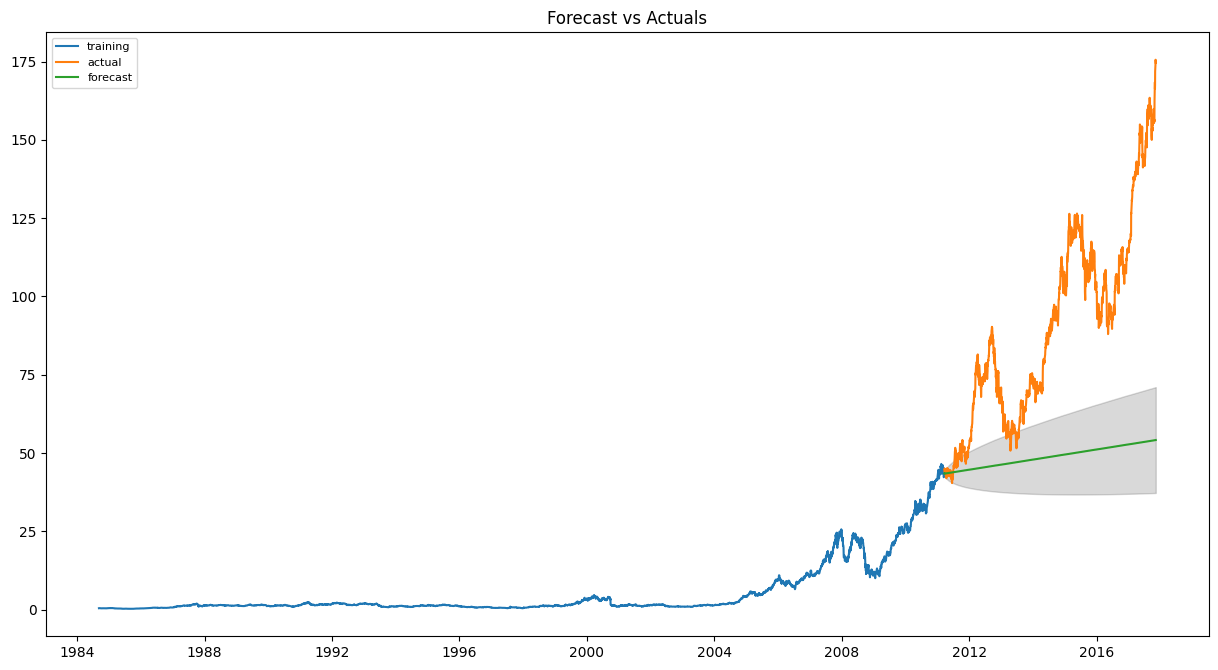

In [157]:
Forecast_Plot(AAPL_Model,AAPL_train,AAPL_test)

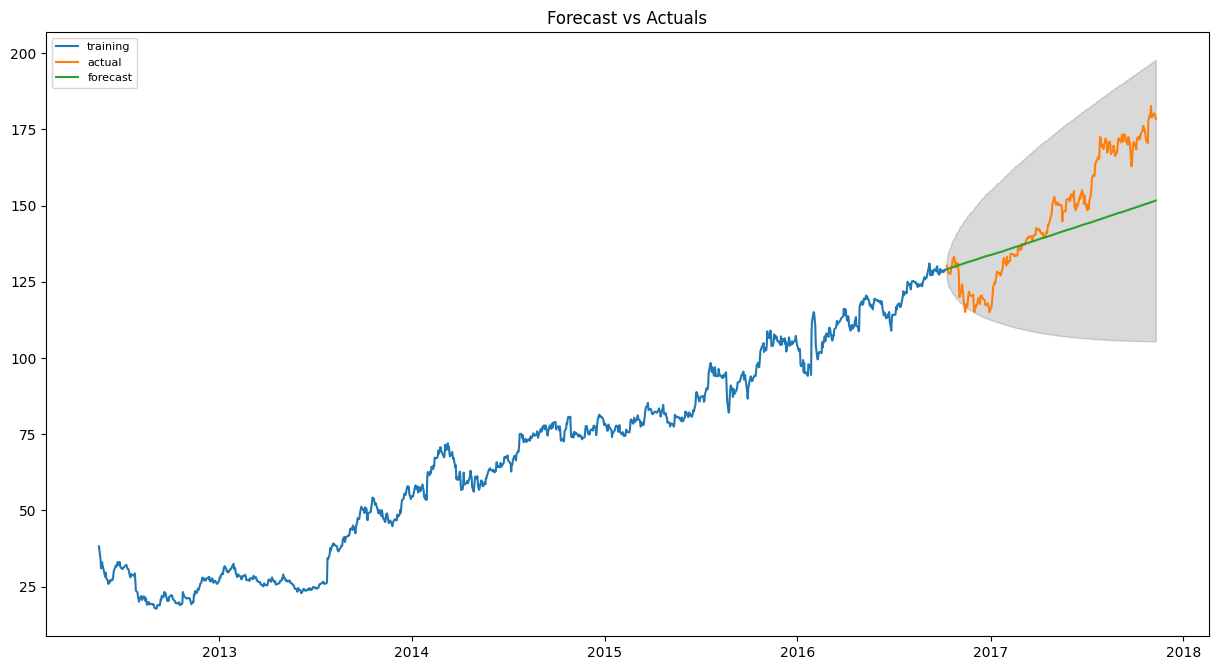

In [158]:
Forecast_Plot(FB_Model,FB_train,FB_test)

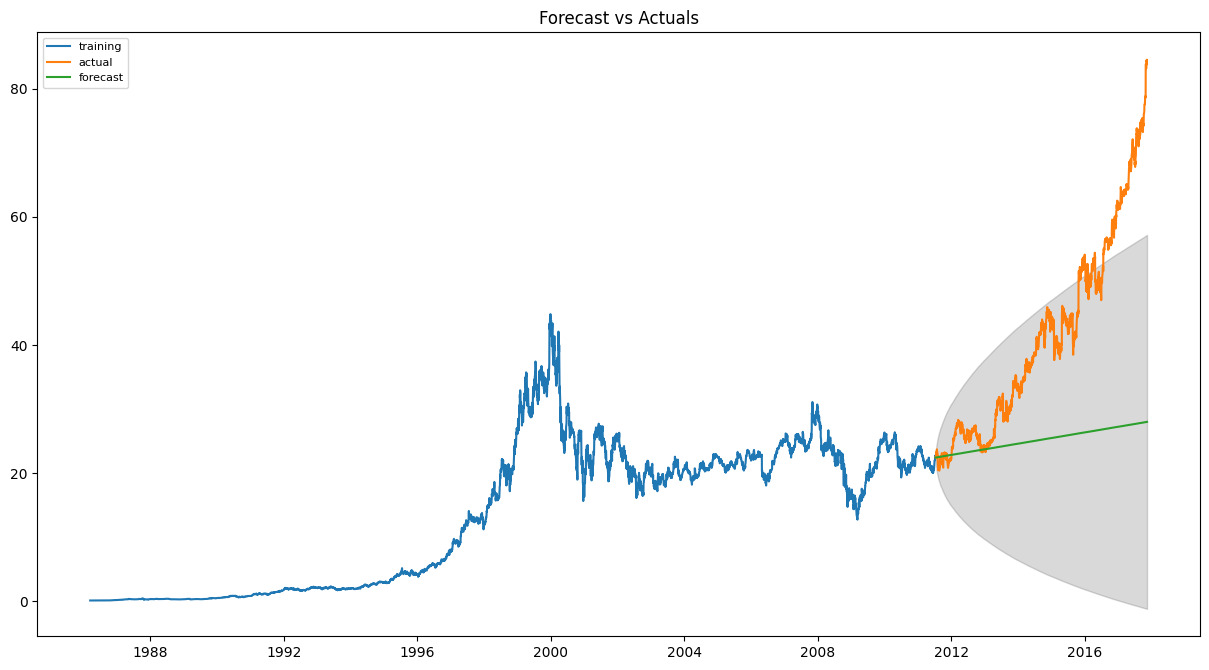

In [159]:
Forecast_Plot(MSFT_Model,MSFT_train,MSFT_test)

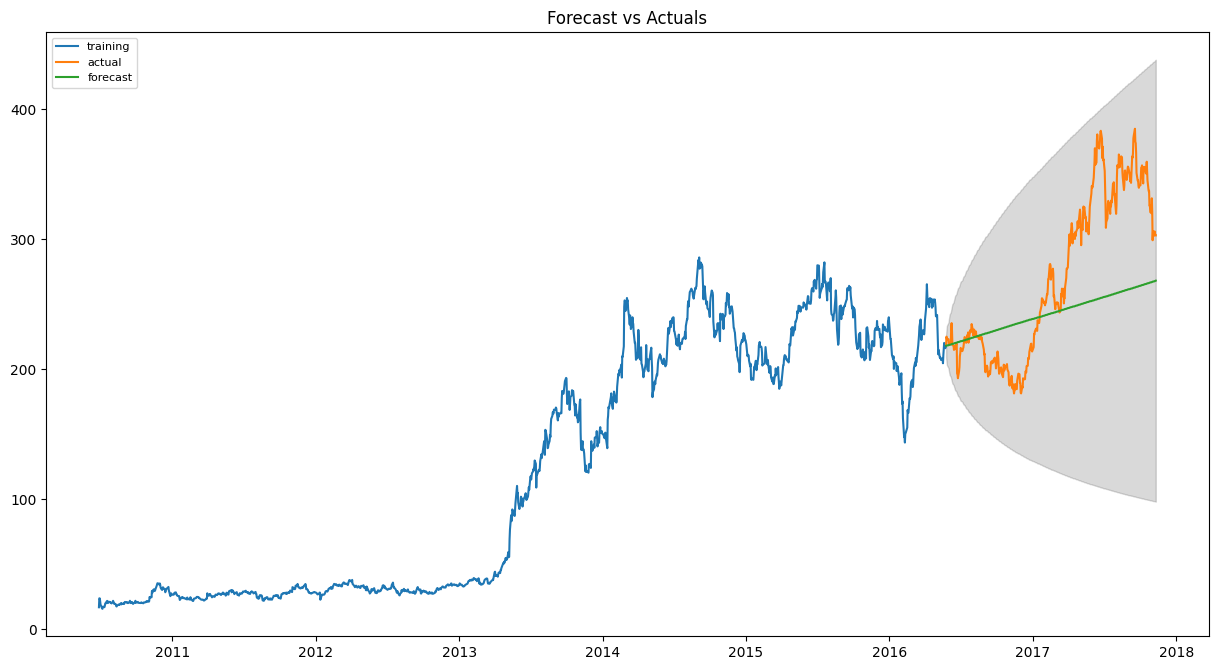

In [160]:
Forecast_Plot(TSLA_Model,TSLA_train,TSLA_test)